In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [6]:
from citipy import citipy
# Find cities using lats and longs

cities = []

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
    
        cities.append(city)


len(cities)
    
    

613

In [7]:
from config import weather_api_key
import requests
from datetime import datetime
import time
# Build basic URL for Open Weather App
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.

record_count = 1
set_count = 1

# Loop through all the cities in our list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | aripuana
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | saint anthony
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | saskylakh
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | sisophon
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | gdov
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | namibe
Processing Record 16 of Set 1 | tuatapere
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | birjand
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | ballina
Processing Record 22 of Set 1 | avarua
Processing R

Processing Record 37 of Set 4 | gizo
Processing Record 38 of Set 4 | tiarei
Processing Record 39 of Set 4 | mahibadhoo
Processing Record 40 of Set 4 | bambanglipuro
Processing Record 41 of Set 4 | nhamunda
Processing Record 42 of Set 4 | saleaula
City not found. Skipping...
Processing Record 43 of Set 4 | kruisfontein
Processing Record 44 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 45 of Set 4 | hobart
Processing Record 46 of Set 4 | dhidhdhoo
Processing Record 47 of Set 4 | portland
Processing Record 48 of Set 4 | garowe
Processing Record 49 of Set 4 | tudela
Processing Record 50 of Set 4 | poum
Processing Record 1 of Set 5 | klaksvik
Processing Record 2 of Set 5 | taltal
Processing Record 3 of Set 5 | payyannur
Processing Record 4 of Set 5 | soubre
Processing Record 5 of Set 5 | leshukonskoye
Processing Record 6 of Set 5 | capitan miranda
Processing Record 7 of Set 5 | ancud
Processing Record 8 of Set 5 | skibbereen
Processing Record 9 of Set 5 | astoria
Proc

Processing Record 27 of Set 8 | pacific grove
Processing Record 28 of Set 8 | gilbues
Processing Record 29 of Set 8 | bara
Processing Record 30 of Set 8 | tawkar
City not found. Skipping...
Processing Record 31 of Set 8 | mullaitivu
City not found. Skipping...
Processing Record 32 of Set 8 | amarpur
Processing Record 33 of Set 8 | mrirt
City not found. Skipping...
Processing Record 34 of Set 8 | the valley
Processing Record 35 of Set 8 | gayeri
Processing Record 36 of Set 8 | dinsor
City not found. Skipping...
Processing Record 37 of Set 8 | nhulunbuy
Processing Record 38 of Set 8 | praia
Processing Record 39 of Set 8 | bajo baudo
City not found. Skipping...
Processing Record 40 of Set 8 | kenai
Processing Record 41 of Set 8 | yabelo
Processing Record 42 of Set 8 | huarmey
Processing Record 43 of Set 8 | meyungs
City not found. Skipping...
Processing Record 44 of Set 8 | singkang
Processing Record 45 of Set 8 | coquimbo
Processing Record 46 of Set 8 | carutapera
Processing Record 47 of

Processing Record 14 of Set 12 | college
Processing Record 15 of Set 12 | vanimo
Processing Record 16 of Set 12 | mwene-ditu
Processing Record 17 of Set 12 | chokwe
Processing Record 18 of Set 12 | shingu
Processing Record 19 of Set 12 | moron
Processing Record 20 of Set 12 | kununurra
Processing Record 21 of Set 12 | palmas
Processing Record 22 of Set 12 | maturin
Processing Record 23 of Set 12 | gornozavodsk
Processing Record 24 of Set 12 | melbu
Processing Record 25 of Set 12 | mogwase
Processing Record 26 of Set 12 | necochea
Processing Record 27 of Set 12 | presidencia roque saenz pena
Processing Record 28 of Set 12 | gurskoye
City not found. Skipping...
Processing Record 29 of Set 12 | san ignacio de sabaneta
City not found. Skipping...
Processing Record 30 of Set 12 | goba
Processing Record 31 of Set 12 | toora-khem
Processing Record 32 of Set 12 | omis
Processing Record 33 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 34 of Set 12 | kapit
Processing Record 3

In [9]:
print(len(city_data))

561


In [10]:
import pandas as pd

# Create city data DataFrame

city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,77.20,78,5,19.10,PF,2022-05-12 20:26:55
1,Aripuana,-9.1667,-60.6333,89.71,50,78,3.06,BR,2022-05-12 20:26:55
2,Yellowknife,62.4560,-114.3525,46.92,57,40,10.36,CA,2022-05-12 20:26:56
3,Saint Anthony,45.0205,-93.2180,80.65,63,0,17.27,US,2022-05-12 20:26:56
4,Punta Arenas,-53.1500,-70.9167,46.42,81,75,10.36,CL,2022-05-12 20:26:57


In [11]:
#re order columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp',
       'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-05-12 20:26:55,-23.1203,-134.9692,77.20,78,5,19.10
1,Aripuana,BR,2022-05-12 20:26:55,-9.1667,-60.6333,89.71,50,78,3.06
2,Yellowknife,CA,2022-05-12 20:26:56,62.4560,-114.3525,46.92,57,40,10.36
3,Saint Anthony,US,2022-05-12 20:26:56,45.0205,-93.2180,80.65,63,0,17.27
4,Punta Arenas,CL,2022-05-12 20:26:57,-53.1500,-70.9167,46.42,81,75,10.36


In [12]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
cloudiness

0       5
1      78
2      40
3       0
4      75
       ..
556    40
557    40
558    36
559    87
560    93
Name: Cloudiness, Length: 561, dtype: int64

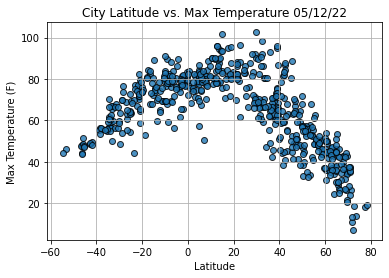

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

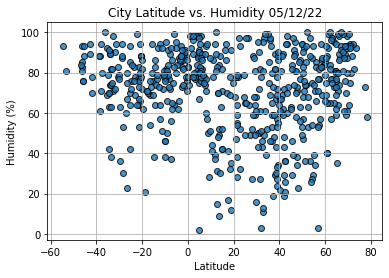

In [15]:
# Build the scatter plot for latitude vs. Humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

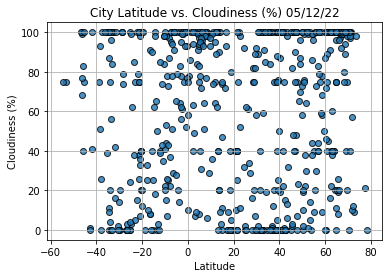

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

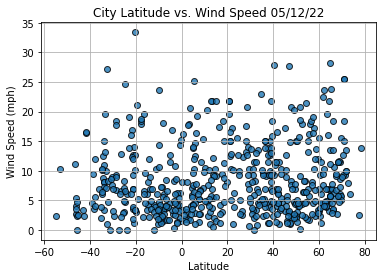

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()